<a href="https://colab.research.google.com/github/sourav03dutta/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
#### **NAME**  -  **Sourav Dutta**, Cohort Montreal, ALMABETTER

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of Risk Management, the result of perdictive accuracy of the estimated probability of default will be more valuable then the binary result of Classification - credible or not credible clients.


# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [380]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from scipy import stats
from scipy.stats import ttest_ind_from_stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')



### Dataset Loading

In [381]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

working_dir_path = '/content/drive/My Drive/Almabetter Projects/Machine Learning - Classification/Credit Card Default Prediction/'
Credit_Data = pd.read_excel(working_dir_path + 'default of credit card clients.xls')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [382]:
# Dataset First Look

Credit_Data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [383]:
# Removing unnamed row from the dataset

Credit_Data.rename(columns=Credit_Data.iloc[0], inplace = True)
Credit_Data.drop([0], inplace = True)

In [384]:
Credit_Data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [385]:
# Dataset Rows & Columns count

Credit_Data.shape

(30000, 25)

### Dataset Information

In [386]:
# Dataset Info

Credit_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

#### Duplicate Values

In [387]:
# Dataset Duplicate Value Count

Credit_Data.duplicated().sum()

0

#### Missing Values/Null Values

In [388]:
# Missing Values/Null Values Count

Credit_Data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

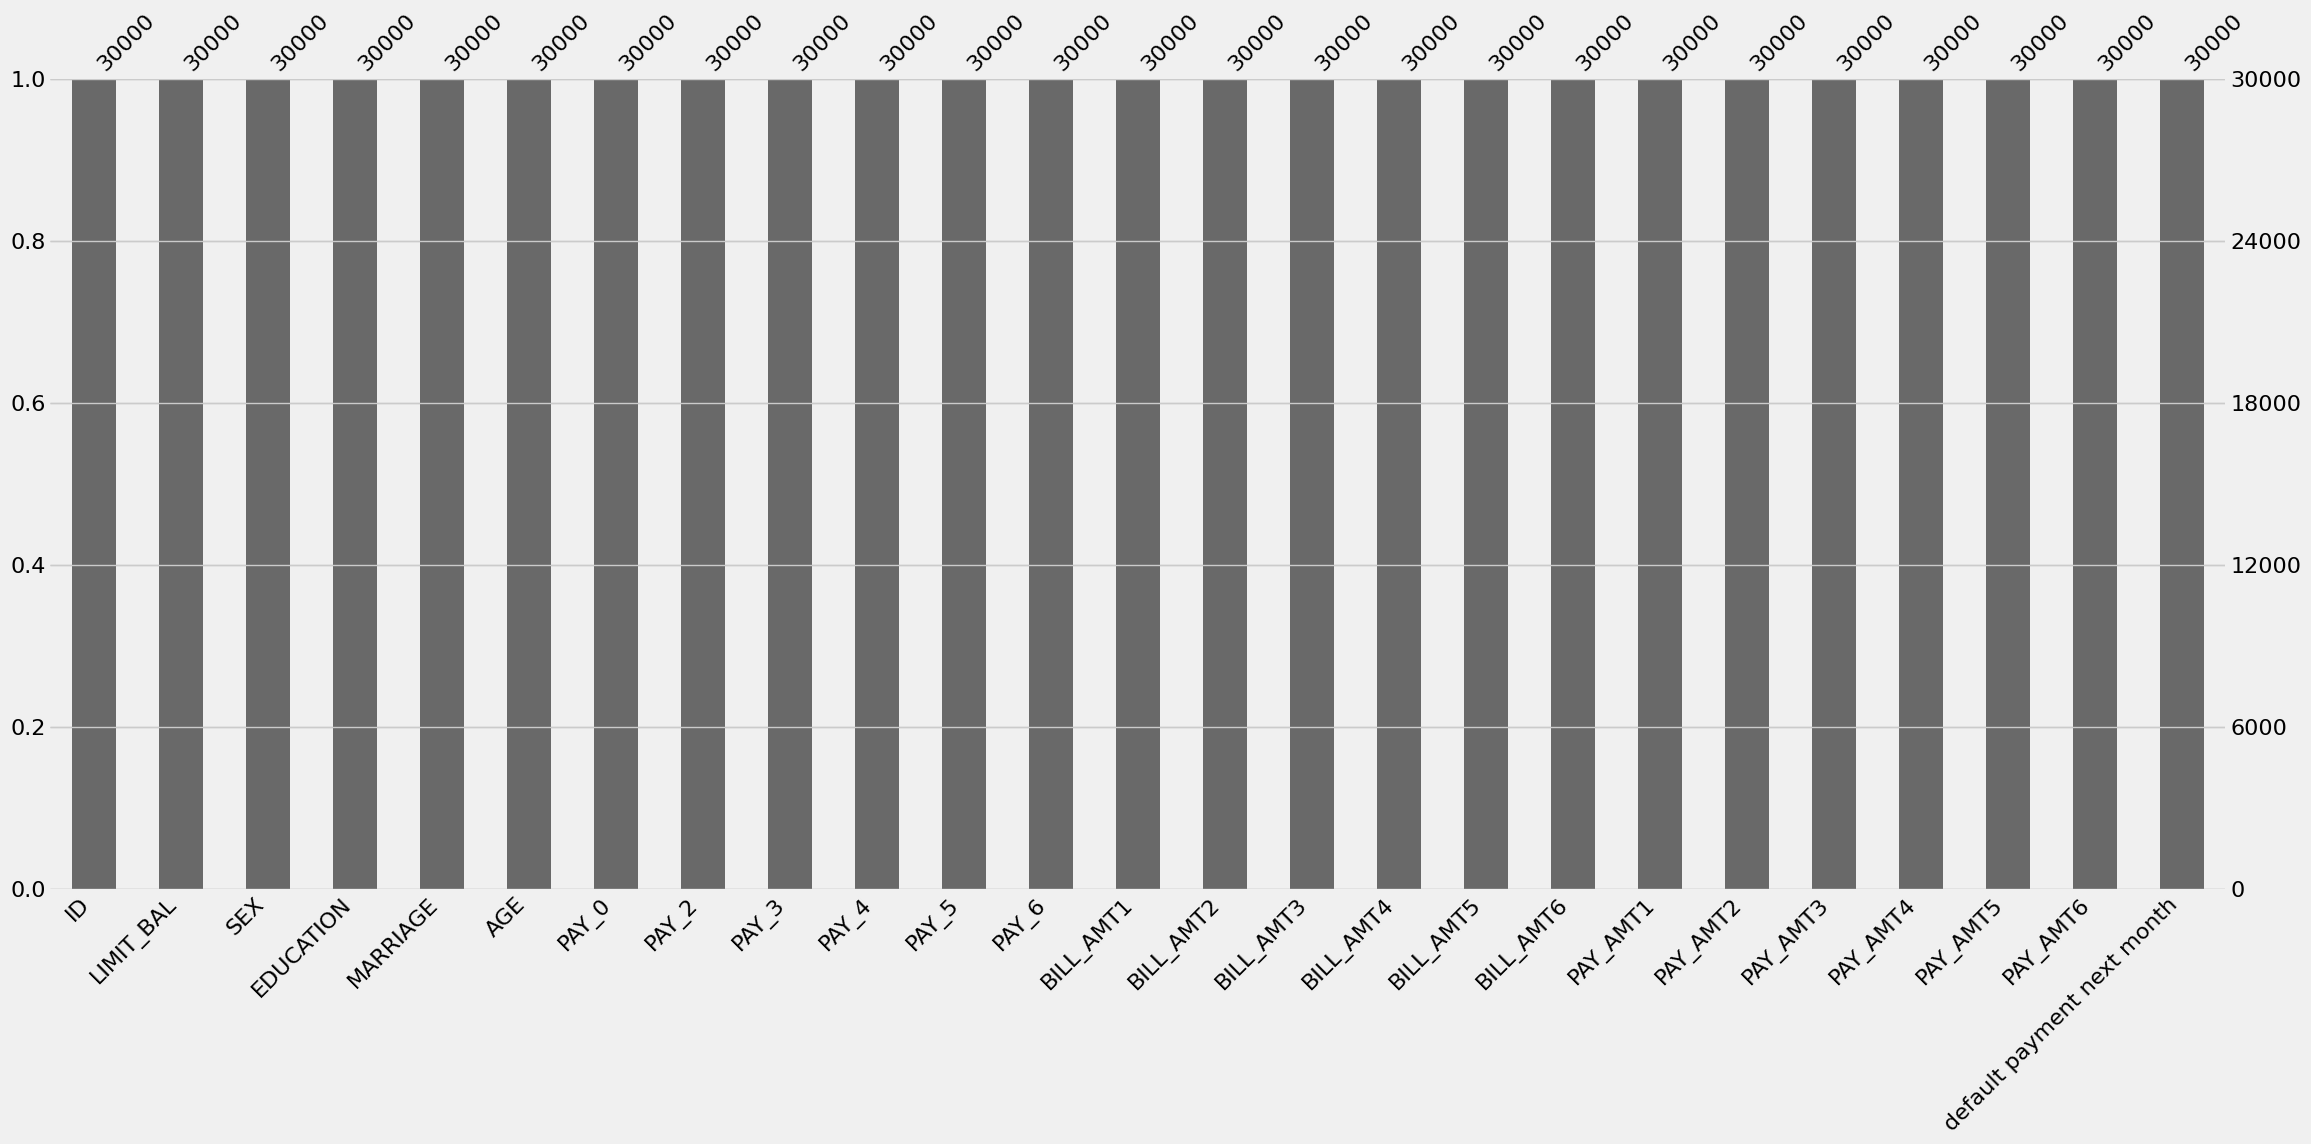

In [389]:
# Visualizing the missing values

msno.bar(Credit_Data)

### What did you know about your dataset?

The dataset is all about Credit Card clients. In this dataset, there are 30000 rows and 25 columns. The dataset contains no duplicate values and null values or missing values.

## ***2. Understanding Your Variables***

In [390]:
# Dataset Columns

Credit_Data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [391]:
# Dataset Describe

Credit_Data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### Variables Description


1. ID: ID of each client

2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

3. SEX: Gender (1=male, 2=female)

4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

5. MARRIAGE: Marital status (1=married, 2=single, 3=others)

6. AGE: Age in years

7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, 8=payment delay for eight months, 9=payment delay for nine months and above)

8. PAY_2: Repayment status in August, 2005 (scale same as above)

9. PAY_3: Repayment status in July, 2005 (scale same as above)

10. PAY_4: Repayment status in June, 2005 (scale same as above)

11. PAY_5: Repayment status in May, 2005 (scale same as above)

12. PAY_6: Repayment status in April, 2005 (scale same as above)

13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

25. default payment next month: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [392]:
# The number of unique values for each variable is mentioned in Dataset Description
# Credit_Data.describe()

The number of unique values for each variable is mentioned above.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [393]:
# Write your code to make your dataset analysis ready.

Credit_Data = Credit_Data.rename(columns={'PAY_0': 'PAY_1'})
Credit_Data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### What all manipulations have you done and insights you found?

1. No Duplicate Values

2. No Null or missing values

3. Removed default rows i.e. X1,X2,X3...... given in excel format.

4. Renamed a column for better understanding of the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - CORRELATION HEATMAP

In [394]:
# In previous Credit_Data.info(), all columns, Dtype is in object.
# In order to plot Correlation Heatmap, I have to change all columns, Dtype is in Integer or Float

Credit_Data = Credit_Data.astype(int)
Credit_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [395]:
Correlation = Credit_Data.corr()

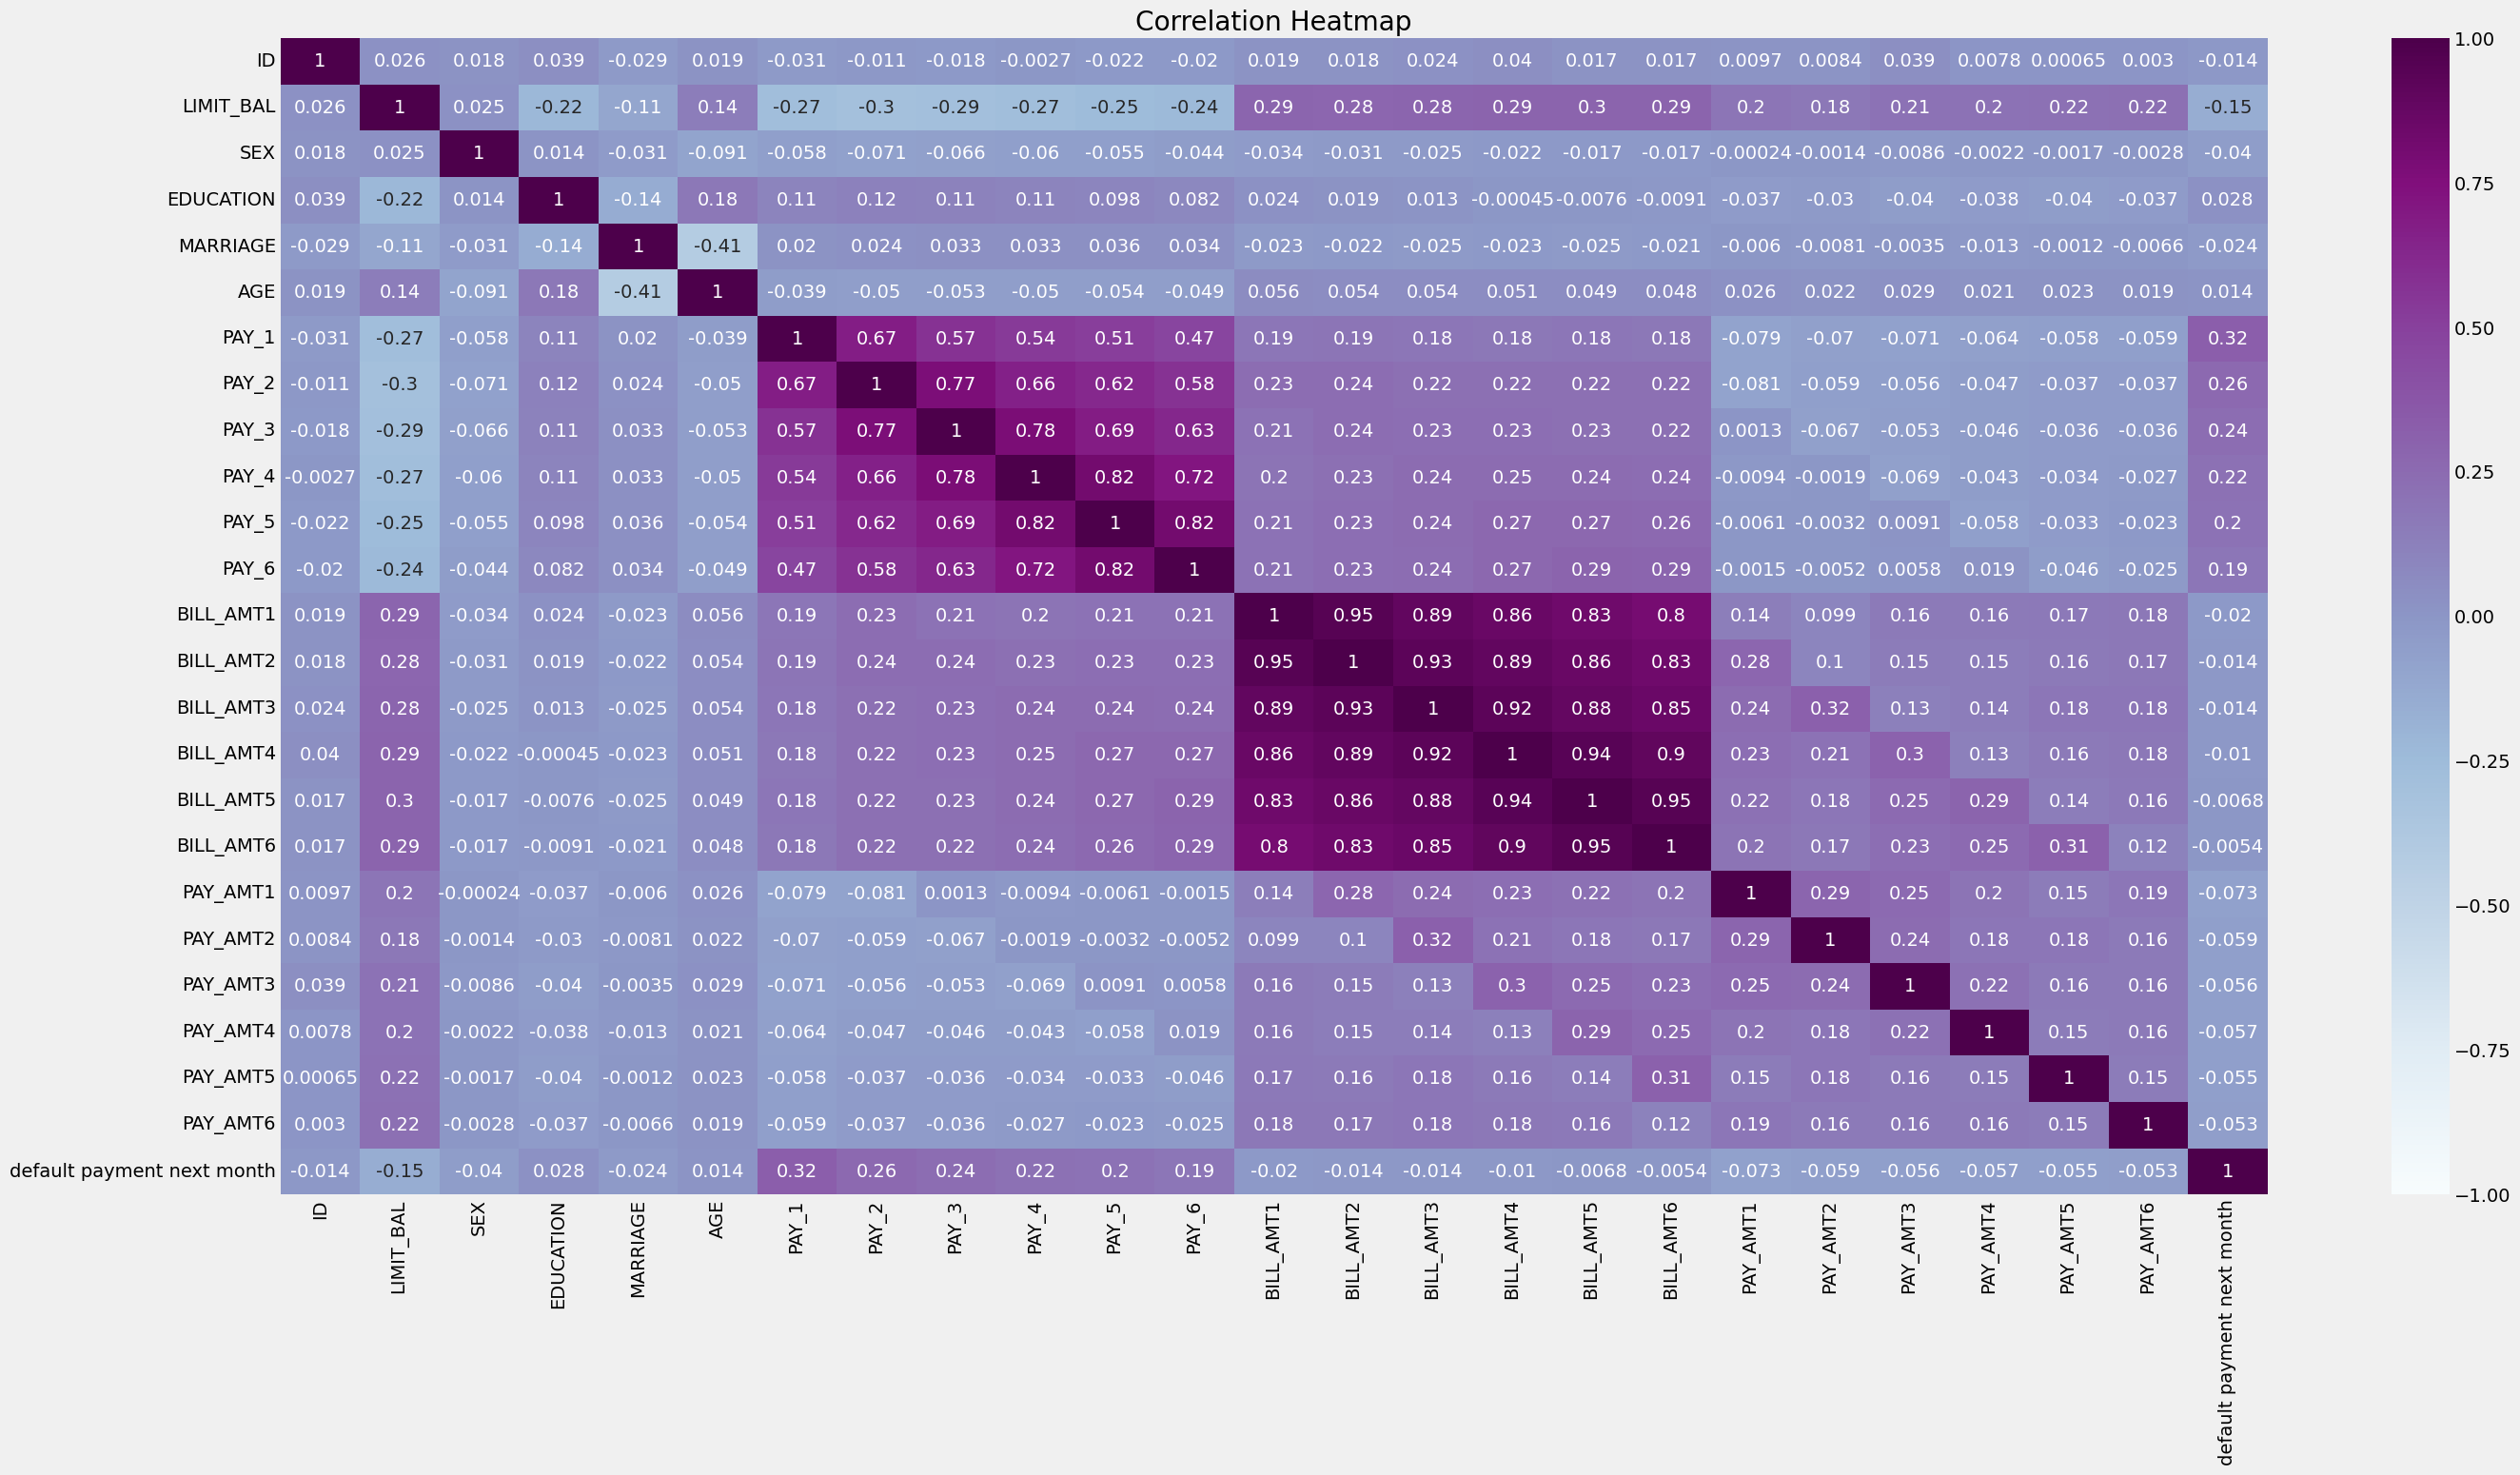

In [396]:
plt.figure(figsize=(30,15))
plt.title('Correlation Heatmap')
corr = sns.heatmap(Correlation, vmin=-1, vmax=1, cmap='BuPu', annot=True )

<Axes: title={'center': 'Correlation with Default'}>

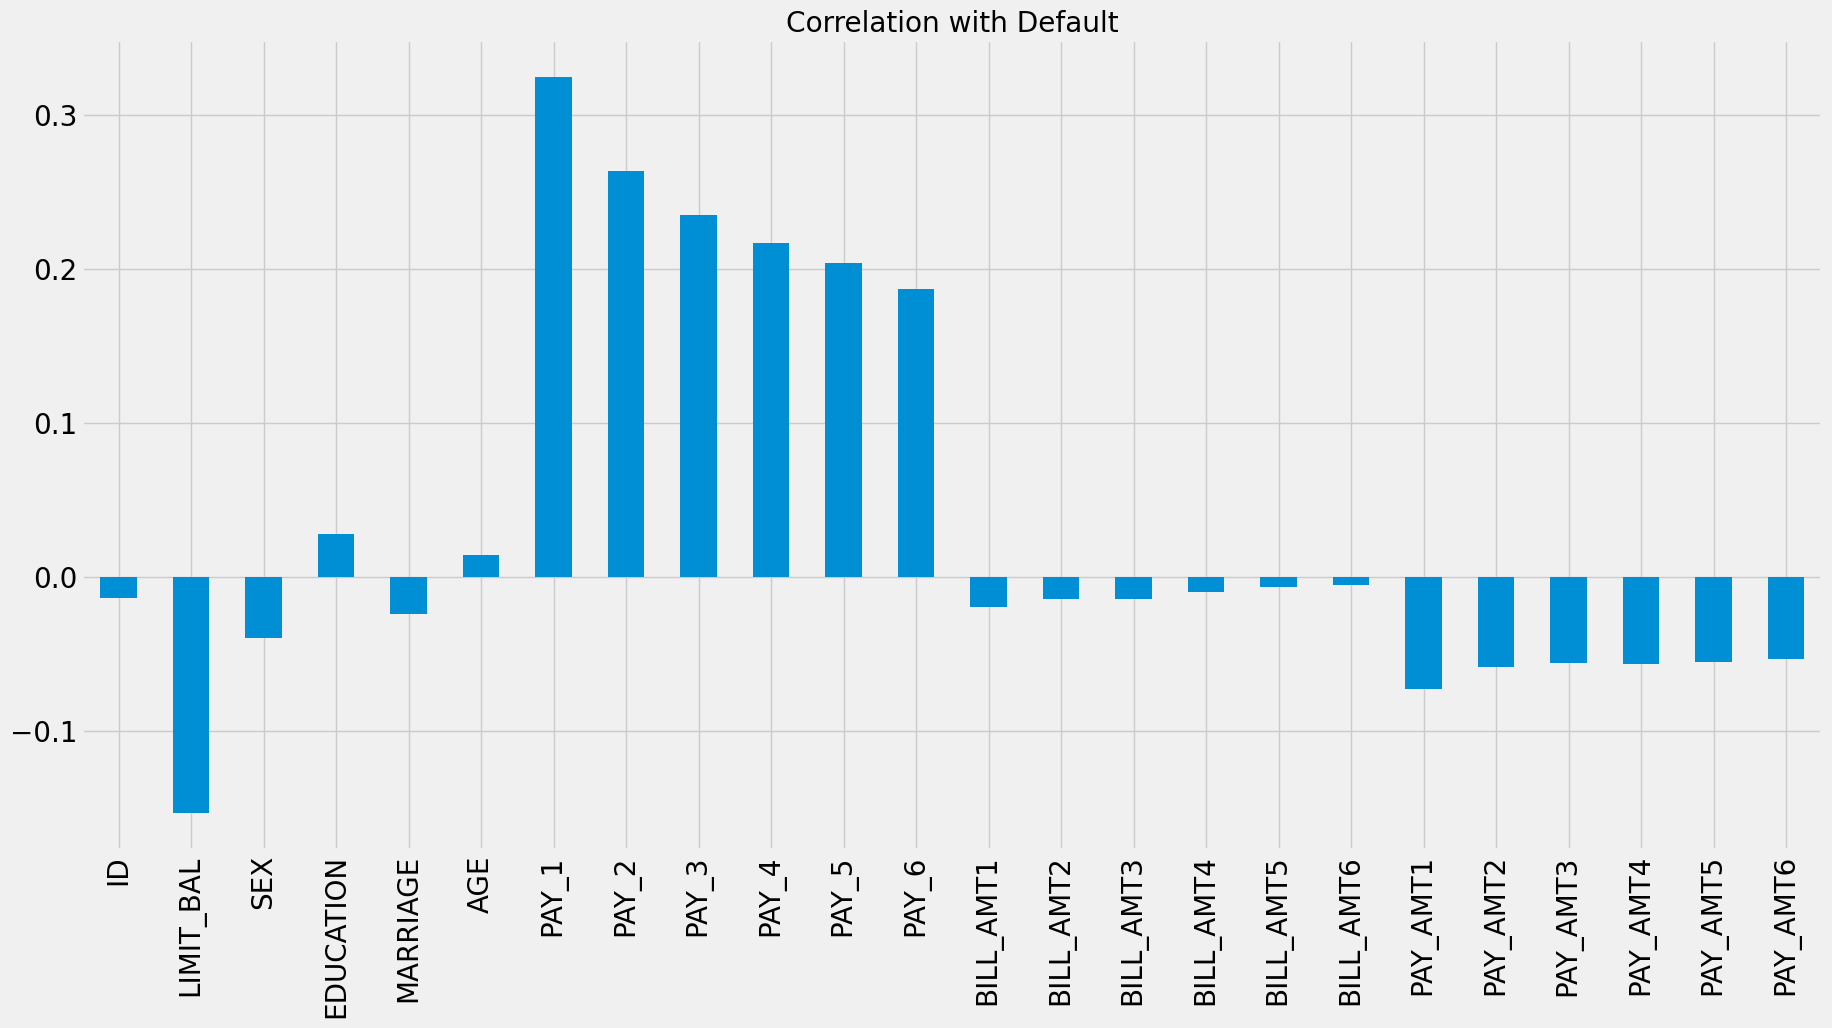

In [397]:
X = Credit_Data.drop(['default payment next month'],axis=1)
X.corrwith(Credit_Data['default payment next month']).plot.bar(figsize = (20, 10), title = "Correlation with Default",
                                        fontsize = 20,rot = 90, grid = True)

##### 1. Why did you pick the specific chart?

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It's like a color chart, that shows us how closely related different variables are.

##### 2. What is/are the insight(s) found from the chart?

1. BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 are strongly correlated with each other i.e. High Positve Correlation.



2. It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove it later.

## ***Univariate Analysis***

#### Chart - 2

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

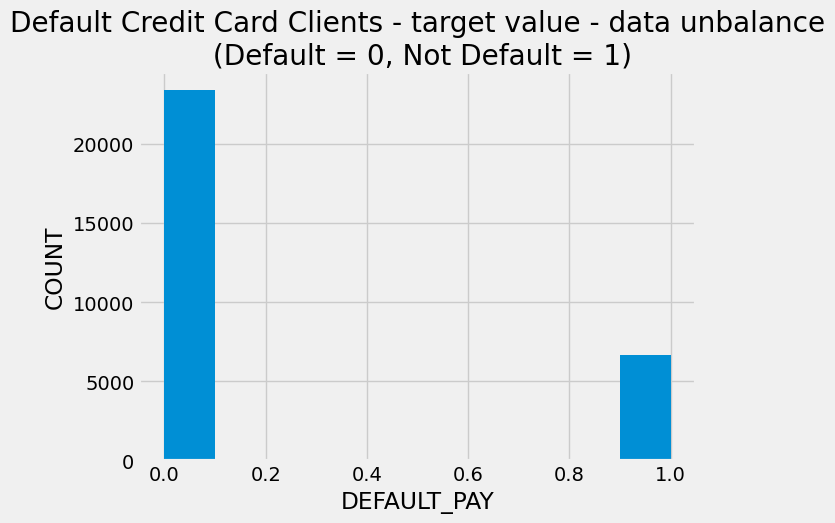

In [398]:
# Chart - 1 visualization code

plt.style.use('fivethirtyeight')
Credit_Data['default payment next month'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.

##### 2. What is/are the insight(s) found from the chart?

Percentage of Defaulters are smaller than the Non Defaulters in the given dataset.

#### Chart - 3

Text(0.5, 1.0, 'SEX v/s COUNT')

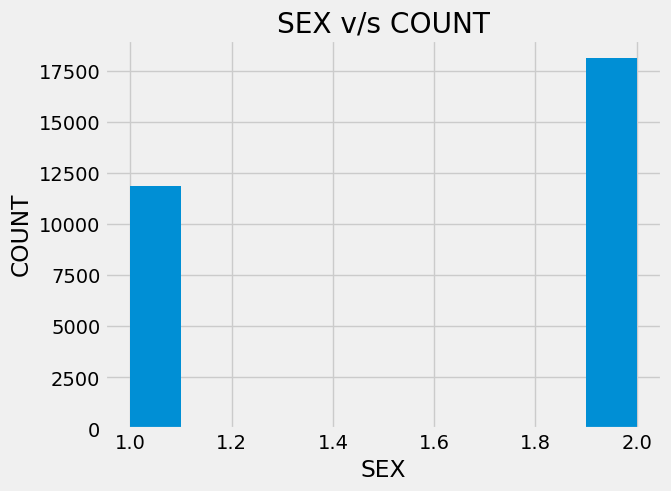

In [399]:
# Chart - 2 visualization code

plt.style.use('fivethirtyeight')
Credit_Data['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

##### What is/are the insight(s) found from the chart?

Number of Male credit card holder is less than Female.

#### Chart - 4

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

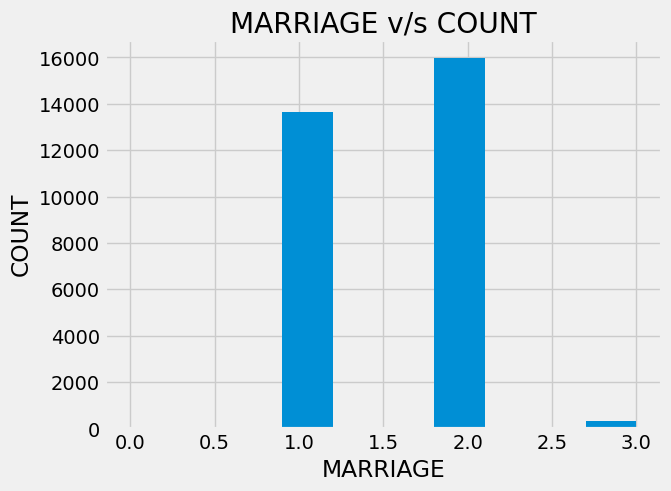

In [400]:
# Chart - 3 visualization code

plt.style.use('fivethirtyeight')
Credit_Data['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

##### What is/are the insight(s) found from the chart?

More number of credit cards holder are Married.

#### Chart - 5

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

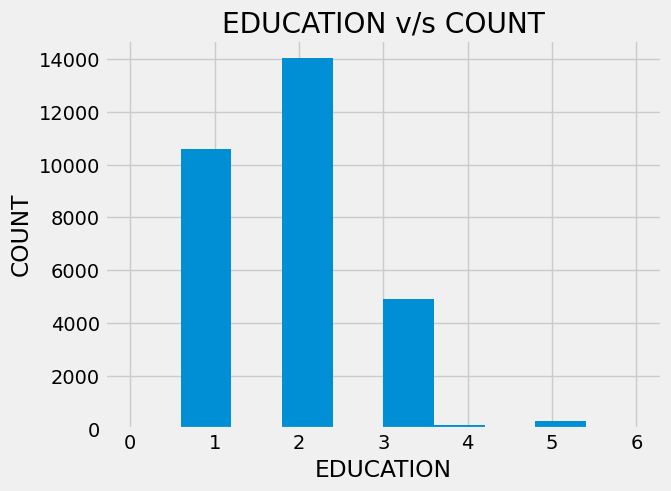

In [401]:
# Chart - 4 visualization code

plt.style.use('fivethirtyeight')
Credit_Data['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

##### What is/are the insight(s) found from the chart?

More number of credit card holders are university students followed by Graduates and then High school students.

## ***Bivariate Analysis***

#### Chart - 6

In [402]:
# Set ID as dataframe index

Credit_Data.set_index('ID', inplace = True)
Credit_Data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [403]:
# Create a new column "HAS_DEF" to indicate customers who have at least 1 deafult payment from PAY_1 to Pay_6
# 0 : no default ; 1: has default

def_condition = (Credit_Data.PAY_1 >1) | (Credit_Data.PAY_2 >1) | (Credit_Data.PAY_3 >1) | (Credit_Data.PAY_4 >1) | (Credit_Data.PAY_5 >1) | (Credit_Data.PAY_6 >1)
Credit_Data.loc[def_condition, "HAS_DEF"] = 1
Credit_Data.loc[Credit_Data.HAS_DEF.isna(), "HAS_DEF"] = 0

In [404]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=Credit_Data['HAS_DEF'],columns = Credit_Data[column_name], normalize = 'columns')

    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))

    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()

    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"

    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5

    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")

    plt.xticks(list(range(len(labels))), rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()


In [405]:
Credit_Data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [406]:
# Change sex code to 'F' and 'M' and use category as datatype

Credit_Data["SEX"]=Credit_Data["SEX"].map({1:'M',2:'F'}).astype('category')
Credit_Data["SEX"].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

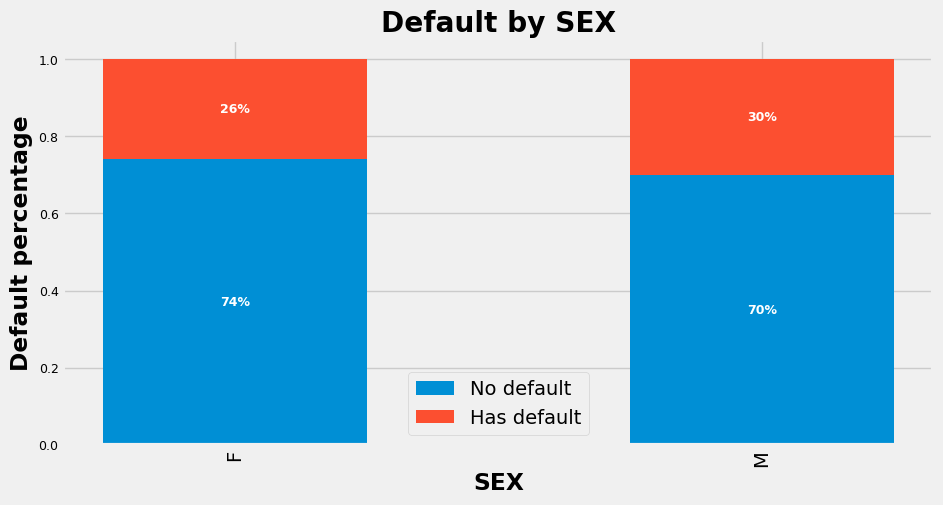

In [407]:
# Chart - 5 visualization code

create_stacked_bar('SEX')

##### 1. Why did you pick the specific chart?

A stacked chart is a form of bar chart that shows the composition and comparison of a few variables, either relative or absolute, over time. Also called a stacked bar or column chart, they look like a series of columns or bars that are stacked on top of each other.

##### 2. What is/are the insight(s) found from the chart?

30% male have default payment while 26% female have default payment, the difference is not significant.

#### Chart - 7

In [408]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

Credit_Data["EDUCATION"] = Credit_Data["EDUCATION"].replace({4:0,5:0,6:0})
Credit_Data["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

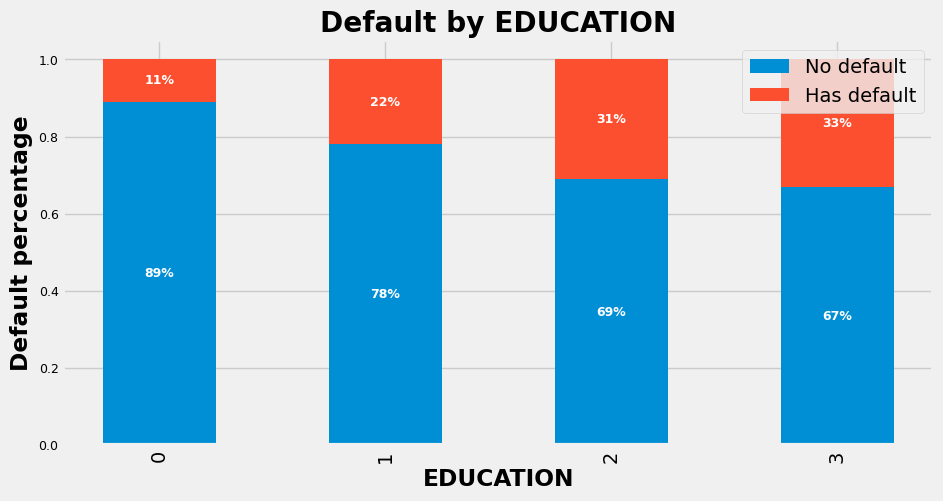

In [409]:
# Chart - 6 visualization code

# Plot a stacked bar chart to show default by education level

create_stacked_bar('EDUCATION')



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [410]:
# How many customers had "MARRIAGE" status as 0?

Credit_Data["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [411]:
# Combine 0 and 3 by changing the value 3 into 0

Credit_Data["MARRIAGE"] = Credit_Data["MARRIAGE"].replace({3:0})
Credit_Data["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
0    0.012567
Name: MARRIAGE, dtype: float64

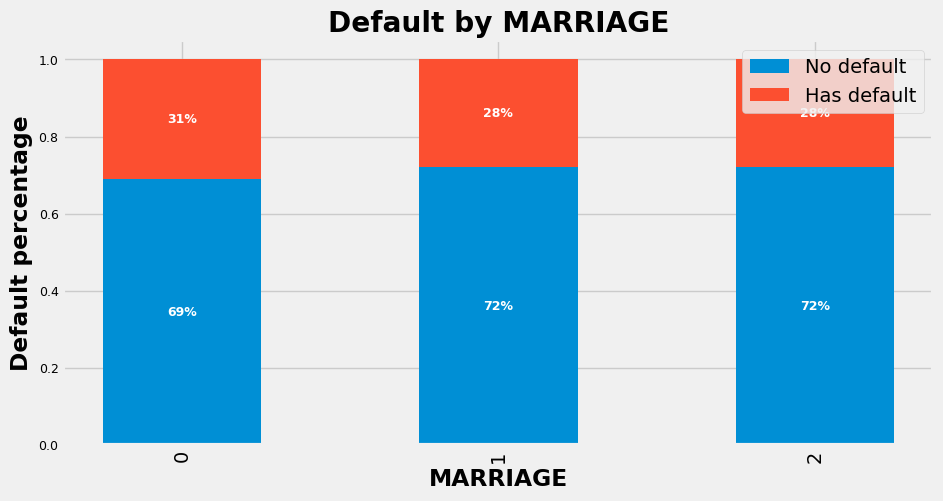

In [412]:
# Chart - 7 visualization code

# Plot a stacked bar chart to visualize default and non-default distribution by marital status

create_stacked_bar('MARRIAGE')

##### What is/are the insight(s) found from the chart?

There is no difference of default risk in terms of marital status, although the 'other'marital status group had high default percentage.

#### Chart - 9

In [413]:
# Segment the 'AGE' column to 6 groups

bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
Credit_Data['AGE'] = pd.cut(Credit_Data['AGE'],bins=bins, labels=labels,right=False)

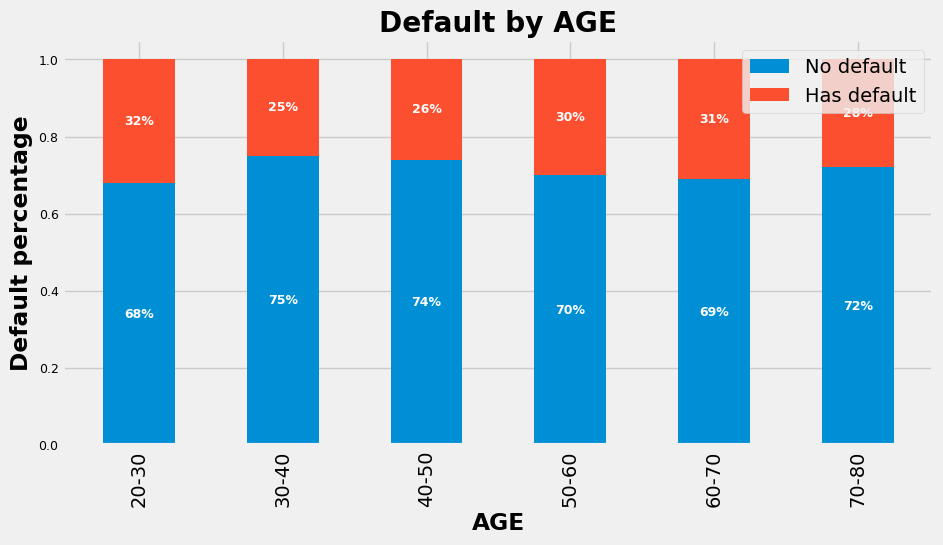

In [414]:
# Chart - 8 visualization code

# Plot a stacked bar chart to visualize default and non-default by age

create_stacked_bar('AGE')

##### What is/are the insight(s) found from the chart?

Customers aged between 30-50 had the lowest delayed payment rate, while younger groups (20-30) and older groups (50-70) all had higher delayed payment rates. However, the delayed rate dropped slightly again in customers older than 70 years.

#### Chart - 10

In [415]:
# Chart - 9 visualization code

# Subset a dataframe with the records that have default

has_default = Credit_Data[Credit_Data['HAS_DEF']== 1]
default_trend = has_default[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

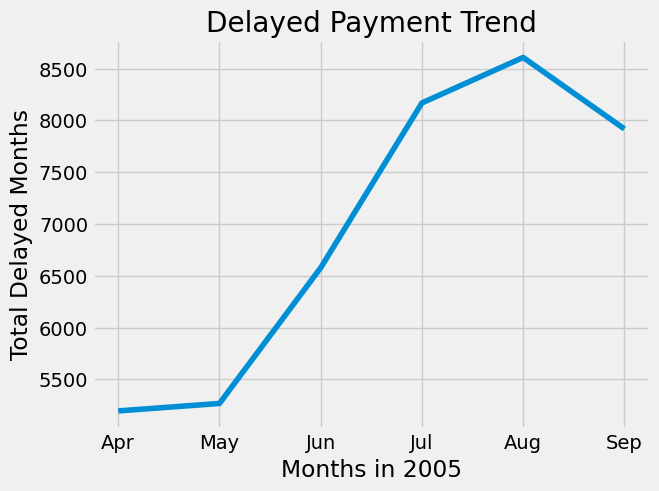

In [416]:
# Draw a line chart to show the trend. The lower the number, the shorter delayed payment
fig,ax = plt.subplots()
ax.plot(default_trend)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005')
plt.ylabel('Total Delayed Months')
plt.title('Delayed Payment Trend')

plt.show()

##### 1. Why did you pick the specific chart?

A line chart or line graph, also known as curve chart, is a type of chart which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields. It is similar to a scatter plot except that the measurement points are ordered (typically by their x-axis value) and joined with straight line segments. A line chart is often used to visualize a trend in data over intervals of time – a time series – thus the line is often drawn chronologically. In these cases they are known as run charts.

##### 2. What is/are the insight(s) found from the chart?

There was a huge jump from May,2005 (PAY_5) to July, 2005 (PAY_3) when delayed payment increased significantly, then it peaked at August, 2005 (PAY_2), things started to get better in September, 2005 (PAY_1).

#### **11. Why are some bill statement amounts greater than credit limit?**

In [417]:
# Is there any bill amount that is greater than credit limit?

condition1 = Credit_Data['BILL_AMT1'] > Credit_Data['LIMIT_BAL']
condition2 = Credit_Data['BILL_AMT2'] > Credit_Data['LIMIT_BAL']
condition3 = Credit_Data['BILL_AMT3'] > Credit_Data['LIMIT_BAL']
condition4 = Credit_Data['BILL_AMT4'] > Credit_Data['LIMIT_BAL']
condition5 = Credit_Data['BILL_AMT5'] > Credit_Data['LIMIT_BAL']
condition6 = Credit_Data['BILL_AMT6'] > Credit_Data['LIMIT_BAL']

large_bill = Credit_Data[condition1 | condition2 |condition3 | condition4 | condition5 | condition6]
large_bill.shape

(3931, 25)

In [418]:
large_bill["HAS_DEF"].value_counts()

0.0    2184
1.0    1747
Name: HAS_DEF, dtype: int64

##### What is/are the insight(s) found from the chart?

The common sense is that the bill statement amount should not exceed credit limit, however, there are 3931 customers whose bill amounts are greater than credit limit. May be the difference be late payment interest assuming these customers had delayed payment.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Ideally, we should have customers' income data, but since this data is not available, we can assume higher income customers have higher credit limits. Therefore, we will verify if there is a correlation between credit limit and default payment using t-test.

Null hypothesis: Credit limit does not affect default likelihood.

Alternative hypothesis: Credit limit impact default likelihood.

Set significance level alpha to 0.05

#### 2. Perform an appropriate statistical test.

In [419]:
# Perform Statistical Test to obtain P-Value

no_def_limit = Credit_Data.loc[Credit_Data['HAS_DEF']==0,'LIMIT_BAL']
def_limit = Credit_Data.loc[Credit_Data['HAS_DEF']==1,'LIMIT_BAL']

In [420]:
ttest_ind_from_stats(mean1=np.mean(no_def_limit),std1=np.std(no_def_limit),nobs1=len(no_def_limit),
                     mean2=np.mean(def_limit),std2=np.std(def_limit),nobs2=len(def_limit))

Ttest_indResult(statistic=46.75876568055524, pvalue=0.0)

We get a p value as 0, therefore we need to reject the null hypothesis and accept the alternative hypothesis. Credit limit has an impact on payment
default.

##### Which statistical test have you done to obtain P-Value?

T Test :- A t-test is a type of statistical analysis used to compare the averages of two groups and determine if the differences between them more are likely to arise from random chance. It is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Previous visualization indicates Education impacts default likelihood. We will use a Chi-squared test to verify this finding.

Null hypothesis: Education does not affect default likelihood.

Alternative hypothesis: Education impacts default likelihood.

Set significance level alpha to 0.05

#### 2. Perform an appropriate statistical test.

In [421]:
# Get the contigence table of education and default data

edu_def_contigence = pd.crosstab(Credit_Data['HAS_DEF'], Credit_Data['EDUCATION'], margins=False)
edu_def_contigence

EDUCATION,0,1,2,3
HAS_DEF,,,,
0.0,417,8205,9727,3271
1.0,51,2380,4303,1646


In [422]:
# Perform Statistical Test to obtain P-Value

stat, p, dof, expected = chi2_contingency(edu_def_contigence)

p

9.997508691343157e-76

Since the p value is close to 0, we will reject the null hypothesis and accept the alternative hypothesis. Because education has a strong correlation with default probability, we should keep this variable in the machine learning model.

##### Which statistical test have you done to obtain P-Value?

Chi Square Test :- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test used in the analysis of contingency tables when the sample sizes are large. In simpler terms, this test is primarily used to examine whether two categorical variables (two dimensions of the contingency table) are independent in influencing the test statistic (values within the table). The test is valid when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test and variants thereof. Pearson's chi-squared test is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table. For contingency tables with smaller sample sizes, a Fisher's exact test is used instead.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Previous visualization indicates Age impacts default likelihood. We will use a chi-squared test to verify this finding.

Null hypothesis: Age does not affect default likelihood.

Alternative hypothesis: Age impacts default likelihood.

Set significance level alpha to 0.05

#### 2. Perform an appropriate statistical test.

In [423]:
# Get the contigence table of age and default data

age_def_contigence = pd.crosstab(Credit_Data['HAS_DEF'], Credit_Data['AGE'], margins=False)
age_def_contigence

AGE,20-30,30-40,40-50,50-60,60-70,70-80
HAS_DEF,,,,,,
0.0,6570,8413,4769,1633,217,18
1.0,3048,2825,1695,708,97,7


In [424]:
# Perform Statistical Test to obtain P-Value

stat, p, dof, expected = chi2_contingency(age_def_contigence)

p

6.185243361338736e-26

The p value is smaller than significance level, we will reject the null hypothesis and accept the alternative hypothesis, which is age has impact on default probability.

##### Which statistical test have you done to obtain P-Value?

Chi Square Test

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [425]:
Credit_Data = Credit_Data.drop('HAS_DEF', axis=1)

In [426]:
# Handling Missing Values & Missing Value Imputation

Credit_Data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no Missing Values or Null Values.

### 2. Categorical Encoding

In [427]:
# Encode your categorical columns

# Covert categorical column into integer by extracting the code of the categories
Credit_Data.AGE = Credit_Data.AGE.cat.codes
Credit_Data.SEX = Credit_Data.SEX.cat.codes

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding - Label encoding is a technique used in machine learning and data analysis to convert categorical variables into numerical format. It is particularly useful when working with algorithms that require numerical input, as most machine learning models can only operate on numerical data.

### 3. Handling Imbalanced Dataset

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64


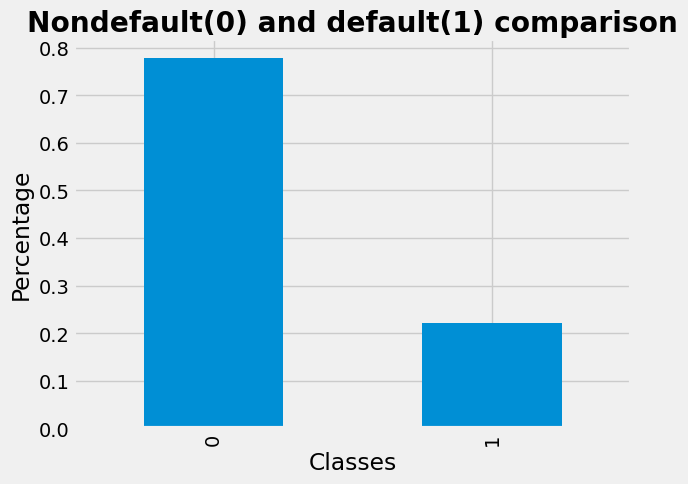

In [428]:
#check for class imbalance

cla_bal = Credit_Data['default payment next month'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

In [429]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(Credit_Data[(i for i in list(Credit_Data.describe(include='all').columns) if i != 'default payment next month')], Credit_Data['default payment next month'])

print('Original unbalanced dataset shape', len(Credit_Data))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [430]:
#creating new dataframe from balanced dataset after SMOTE
balanced_Credit_Data = pd.DataFrame(X_smote, columns=list(i for i in list(Credit_Data.describe(include='all').columns) if i != 'default payment next month'))

#adding target variable to new created dataframe
balanced_Credit_Data['default payment next month'] = y_smote


1    0.5
0    0.5
Name: default payment next month, dtype: float64


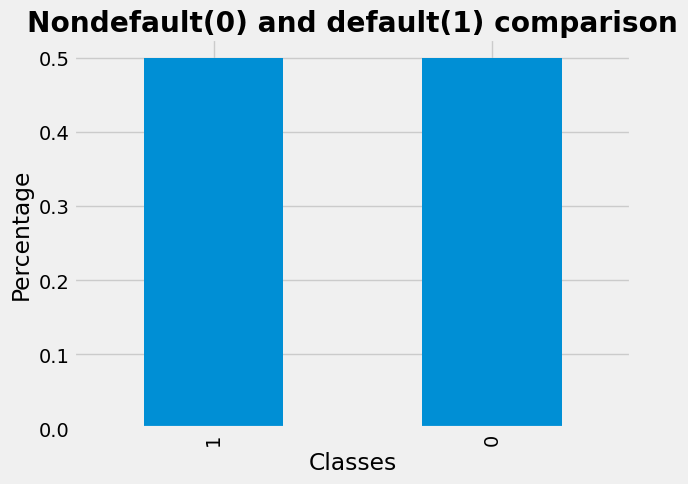

In [431]:
#check for class imbalance

cla_bal = balanced_Credit_Data['default payment next month'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

In [432]:
balanced_Credit_Data.shape

(46728, 24)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

***SMOTE: a powerful solution for imbalanced data***

SMOTE stands for Synthetic Minority Oversampling Technique. The method was proposed in a 2002 paper in the Journal of Artificial Intelligence Research. SMOTE is an improved method of dealing with imbalanced data in classification problems. SMOTE is an oversampling technique that generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier.

### 3. Feature Selection

In [433]:
#seperating dependant and independant variabales
X = balanced_Credit_Data[(list(i for i in list(balanced_Credit_Data.describe(include='all').columns) if i != 'default payment next month'))]
y = balanced_Credit_Data['default payment next month']

### 4. Data Splitting

In [434]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

##### What data splitting ratio have you used ?

80:20

### 5. Data Transformation

In [435]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

##### Which method have you used to scale you data?

 StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.

## ***7. ML Model Implementation***

### ML Model - 1

In [436]:
# ML Model - 1 Implementation


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [437]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [438]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [439]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [440]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [441]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [442]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [443]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [444]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [445]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***